![image.png](attachment:image.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/'

In [5]:
import os 

In [6]:
 ! pwd

/content


In [7]:
# directory = '/content/drive/MyDrive/fish



directory = '/content/drive/MyDrive/fish/fish'
train_files = []
target_files = []
fish_types = 'Black Sea Sprat'
for file in os.listdir(os.path.join(directory, fish_types)):
    train_files.append(os.path.join(directory, 'Black Sea Sprat', file))
    target_files.append(os.path.join(directory,  'Black Sea Sprat GT', file))

In [8]:
df = pd.DataFrame({'img' : train_files, 'mask' : target_files})
df.head()

,img,mask
0,/content/drive/MyDrive/fish/fish/Black Sea Spr...,/content/drive/MyDrive/fish/fish/Black Sea Spr...
1,/content/drive/MyDrive/fish/fish/Black Sea Spr...,/content/drive/MyDrive/fish/fish/Black Sea Spr...
2,/content/drive/MyDrive/fish/fish/Black Sea Spr...,/content/drive/MyDrive/fish/fish/Black Sea Spr...
3,/content/drive/MyDrive/fish/fish/Black Sea Spr...,/content/drive/MyDrive/fish/fish/Black Sea Spr...
4,/content/drive/MyDrive/fish/fish/Black Sea Spr...,/content/drive/MyDrive/fish/fish/Black Sea Spr...


In [9]:
df1 = pd.DataFrame()

In [10]:
from tqdm import tqdm

In [11]:
df = df[:20]

In [12]:
(df['img'][0])

'/content/drive/MyDrive/fish/fish/Black Sea Sprat/00001.png'

In [13]:
img = []
for ind in tqdm(range(len(df['img']))):
    origImage = cv2.imread(df['img'][ind])
    #origImage = cv2.cvtColor(origImage, cv2.COLOR_BGR2GRAY, )
    img.append(origImage)
df1['img'] = img

100%|██████████| 20/20 [00:05<00:00,  3.97it/s]


In [14]:
df1['img'].head()

0    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
1    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
2    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
3    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
4    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
Name: img, dtype: object

In [15]:
(df['mask'][0])

'/content/drive/MyDrive/fish/fish/Black Sea Sprat GT/00001.png'

In [16]:
mask = []
for ind in tqdm(range(len(df['mask']))):
    origImage = cv2.imread(df['mask'][ind])
    #print(origImage)
    origImage = cv2.cvtColor(origImage, cv2.COLOR_BGR2GRAY, )
    origImage = (origImage ) 
    mask.append(origImage**2)
df1['mask'] = mask

100%|██████████| 20/20 [00:04<00:00,  4.25it/s]


In [17]:
mask[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [18]:
df1['mask'].head()

0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
2    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
3    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: mask, dtype: object

In [ ]:
mask[0]

In [21]:
for x, y in keras_generator(df1, 16):
    break

In [22]:
x.shape

(16, 256, 256, 3)

In [ ]:
y[0][150]

In [24]:
import keras
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, UpSampling2D, Conv2D, MaxPooling2D, Activation
from keras.layers import Input, Dense

inp = Input(shape=(256, 256, 3))

conv_1_1 = Conv2D(32, (3, 3), padding='same')(inp)
conv_1_1 = Activation('relu')(conv_1_1)

conv_1_2 = Conv2D(32, (3, 3), padding='same')(conv_1_1)
conv_1_2 = Activation('relu')(conv_1_2)

pool_1 = MaxPooling2D(2)(conv_1_2)


conv_2_1 = Conv2D(64, (3, 3), padding='same')(pool_1)
conv_2_1 = Activation('relu')(conv_2_1)

conv_2_2 = Conv2D(64, (3, 3), padding='same')(conv_2_1)
conv_2_2 = Activation('relu')(conv_2_2)

pool_2 = MaxPooling2D(2)(conv_2_2)


conv_3_1 = Conv2D(128, (3, 3), padding='same')(pool_2)
conv_3_1 = Activation('relu')(conv_3_1)

conv_3_2 = Conv2D(128, (3, 3), padding='same')(conv_3_1)
conv_3_2 = Activation('relu')(conv_3_2)

pool_3 = MaxPooling2D(2)(conv_3_2)


conv_4_1 = Conv2D(256, (3, 3), padding='same')(pool_3)
conv_4_1 = Activation('relu')(conv_4_1)

conv_4_2 = Conv2D(256, (3, 3), padding='same')(conv_4_1)
conv_4_2 = Activation('relu')(conv_4_2)

pool_4 = MaxPooling2D(2)(conv_4_2)

up_1 = UpSampling2D(2, interpolation='bilinear')(pool_4)
conv_up_1_1 = Conv2D(256, (3, 3), padding='same')(up_1)
conv_up_1_1 = Activation('relu')(conv_up_1_1)

conv_up_1_2 = Conv2D(256, (3, 3), padding='same')(conv_up_1_1)
conv_up_1_2 = Activation('relu')(conv_up_1_2)


up_2 = UpSampling2D(2, interpolation='bilinear')(conv_up_1_2)
conv_up_2_1 = Conv2D(128, (3, 3), padding='same')(up_2)
conv_up_2_1 = Activation('relu')(conv_up_2_1)

conv_up_2_2 = Conv2D(128, (3, 3), padding='same')(conv_up_2_1)
conv_up_2_2 = Activation('relu')(conv_up_2_2)


up_3 = UpSampling2D(2, interpolation='bilinear')(conv_up_2_2)
conv_up_3_1 = Conv2D(64, (3, 3), padding='same')(up_3)
conv_up_3_1 = Activation('relu')(conv_up_3_1)

conv_up_3_2 = Conv2D(64, (3, 3), padding='same')(conv_up_3_1)
conv_up_3_2 = Activation('relu')(conv_up_3_2)



up_4 = UpSampling2D(2, interpolation='bilinear')(conv_up_3_2)
conv_up_4_1 = Conv2D(32, (3, 3), padding='same')(up_4)
conv_up_4_1 = Activation('relu')(conv_up_4_1)

conv_up_4_2 = Conv2D(1, (3, 3), padding='same')(conv_up_4_1)
result = Activation('sigmoid')(conv_up_4_2)


model = Model(inputs=inp, outputs=result)

In [25]:
from tensorflow import keras

In [26]:
best_w = keras.callbacks.ModelCheckpoint('fcn_best.h5',
                                monitor='val_loss',
                                verbose=0,
                                save_best_only=True,
                                save_weights_only=True,
                                mode='auto',
                                period=1)

last_w = keras.callbacks.ModelCheckpoint('fcn_last.h5',
                                monitor='val_loss',
                                verbose=0,
                                save_best_only=False,
                                save_weights_only=True,
                                mode='auto',
                                period=1)


callbacks = [best_w, last_w]



adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)


model.compile(adam, 'binary_crossentropy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [49]:
df_train = df1

In [50]:
df1.shape[0]/100*80

16.0

In [51]:
df_val = df1

In [27]:
from sklearn.model_selection import train_test_split

In [34]:
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df1['img']),np.array(df1['mask']),test_size=0.2,random_state=0,shuffle=True)

In [40]:
x_tr.shape

(16,)

In [30]:
x_tr,x_val,y_tr,y_val=train_test_split(df1['img'],df1['mask'],test_size=0.2,random_state=0,shuffle=True)

# Changed part. Couldn't split with train_test_split, generator kept throwing errors. Had to split manually

In [63]:
df_permutated = df1.sample(frac=1)

train_size = 0.8
train_end = int(len(df_permutated)*train_size)

df_train = df_permutated[:train_end]
df_test = df_permutated[train_end:]

In [64]:
def keras_generator(gen_df, batch_size):
    while True:
        x_batch = []
        y_batch = []
        
        for i in range(batch_size):
            # print("gen_df = ",gen_df)

            # print("gen_df.sample(1).SHAPE = ",gen_df.sample(1).shape)
            # print("gen_df.sample(1) = ",gen_df.sample(1))
            # print("gen_df.sample(1)[0] = ",gen_df.sample(1)[0])
            # print("gen_df.sample(1).values[0] = ",gen_df.sample(1).values[0])

            img, mask = gen_df.sample(1).values[0]
            # img, mask = gen_df[0]

            img = cv2.resize(img, (256, 256))
            mask = cv2.resize(mask, (256, 256))
            mask =( mask > 0) **2
            
            x_batch += [img]
            y_batch += [mask]

        x_batch = np.array(x_batch) / 255.
        y_batch = np.array(y_batch)

        yield x_batch, np.expand_dims(y_batch, -1)

In [65]:
batch_size = 16
model.fit(keras_generator(df_train, batch_size),
              steps_per_epoch=100,
              epochs=5,
              verbose=1,
              callbacks=callbacks,
              validation_data=keras_generator(df_test, batch_size),
              validation_steps=50,
              class_weight=None,
              max_queue_size=10,
              workers=1,
              use_multiprocessing=False,
              shuffle=True,
              initial_epoch=0)

Epoch 1/5
100/100 [==============================] - 89s 524ms/step - loss: 0.2785 - val_loss: 0.1035
Epoch 2/5
100/100 [==============================] - 52s 522ms/step - loss: 0.0857 - val_loss: 0.0319
Epoch 3/5
100/100 [==============================] - 52s 522ms/step - loss: 0.0243 - val_loss: 0.0210
Epoch 4/5
100/100 [==============================] - 52s 522ms/step - loss: 0.0182 - val_loss: 0.0202
Epoch 5/5
100/100 [==============================] - 55s 556ms/step - loss: 0.0155 - val_loss: 0.0182


In [66]:
pred = model.predict(x)#.shape

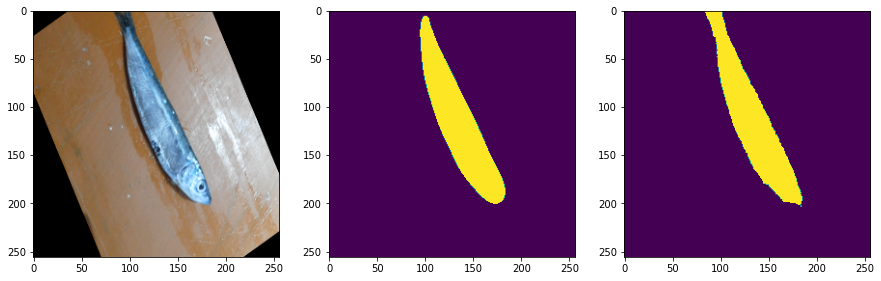

In [76]:
im_id = 0
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
axes[0].imshow(x[im_id])
axes[1].imshow(pred[im_id, ..., 0] > 0.5)
axes[2].imshow(y[im_id, ..., 0])
plt.show()

In [77]:
mask = y[im_id, ..., 0]
pred_mask = pred[im_id, ..., 0] > 0.5

In [78]:
intersection = np.logical_and(mask,pred_mask)
union = np.logical_or(mask,pred_mask)

In [79]:
def IoU(mask, pred_mask):
    # return np.sum(mask*pred_mask)/np.sum(mask+pred_mask)
    # return intersection / union
    return np.sum(intersection) / np.sum(union)

In [80]:
def dice(mask, pred_mask):
    #remeber that for dica you use total number of white pixel in mask + pred_mask (not interseption )
    # return 2*np.sum(mask*pred_mask)/np.sum(mask+pred_mask)
    smooth = 1
    # return (2*intersection + smooth)/ (np.sum(mask) + np.sum(pred_mask) + smooth)
    return (2*np.sum(intersection) + smooth)/ (np.sum(mask) + np.sum(pred_mask) + smooth)


In [81]:
IoU(mask,pred_mask)

0.9197886647454371

In [82]:
dice(mask,pred_mask)

0.9582221480987325